# [**Natural Language Processing with Disaster Tweets**](https://www.kaggle.com/competitions/nlp-getting-started/data)

Predict which Tweets are about real disasters and which ones are not

# Partie 1 **Exploratory Data Analysis**

Il vous est demandé de faire un premier notebook afin de **comprendre, d’explorer et d’effectuer un premier nettoyage** des données. Vous devez notamment être capable de répondre aux questions suivantes : 
* Quelle est la forme du Dataframe ? 
* Y a t-il des valeurs manquantes ou des valeurs dupliquées ? 
* Quelles sont les colonnes qui vont nous intéresser ? 
* Y a-t-il des données aberrantes ou des incohérences majeures dans les données ? 
* Y a t-il des tweets anormalement longs / courts ? Peut-on les considérer comme des outliers ? 
* Quel est le ratio tweet qui parlent de “catastrophes” / tweet normaux ?
* En regardant quelques tweets au hasard, peut-on deviner facilement la “target” ? 
* Peut-on déjà détecter des “patterns” ou des mots clés dans les tweets?
* A votre avis quel serait l’accuracy score qu’un humain pourrait obtenir s’il prédisait  les données “à la main” ?

In [6]:
import pandas as pd
tweets = pd.read_csv('nlp-getting-started/train.csv', encoding='utf-8', index_col='id')
display(tweets)
tweets.info()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


Quelle est la forme du Dataframe ? 

In [7]:
display(tweets.shape)

(7613, 4)

Y a t-il des valeurs manquantes ? 

In [9]:
display(tweets.isna().sum())

keyword       61
location    2533
text           0
target         0
dtype: int64

Y a t-il des valeurs dupliquées ? 

In [13]:
display(tweets.nunique())
display(tweets.index.nunique())

keyword      221
location    3341
text        7503
target         2
dtype: int64

7613

In [15]:
display(tweets.keyword.unique()[:10])

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon'], dtype=object)

In [16]:
display(tweets.location.unique()[:10])

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA',
       'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!',
       'Paranaque City', 'Live On Webcam'], dtype=object)

Quelles sont les colonnes qui vont nous intéresser ? 

In [17]:
# toutes

Y a-t-il des données aberrantes ou des incohérences majeures dans les données ?

In [ ]:
# difficile de répondre sans rentrer réellement dans l'analyse du contenu

Y a t-il des tweets anormalement longs / courts ? Peut-on les considérer comme des outliers ?

In [24]:
# le trop court n'apporte aucune information discriminante
# sans compter qu'il s'agit le plus souvent de farce
# le long peut relever de la farce, mais difficile à déterminer
# sans une introspection du contenu
# conclusion : il serait hâtif de considérer la taille comme un critère pour les outliers
tweet_lens = tweets.text.str.len().sort_values()
display(tweet_lens)
short_index = tweet_lens[tweet_lens < 10].index
long_index = tweet_lens[tweet_lens > 149].index
display(tweets.text[short_index])
display(tweets.text[long_index])
display(tweets.text[1832])


id
6962      7
7295      7
2703      7
36        8
5224      8
       ... 
915     150
919     150
885     151
6833    152
1832    157
Name: text, Length: 7613, dtype: int64

id
6962      Bad day
7295      Err:509
2703      Crushed
36       LOOOOOOL
5224     fatality
7088     Meltdown
44       The end!
5221    Fatality!
40      Cooool :)
Name: text, dtype: object

id
915     @HowardU If 90BLKs&amp;8WHTs colluded 2 take W...
919     @cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...
885     @CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...
6833    It's was about 2:30 in the morning&amp;I went ...
1832    when you're taking a shower and someone flushe...
Name: text, dtype: object

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

On peut faire etat des nombres relatifs de catastrophes en fonction des tailles

,target
text,
7,0.0
8,0.0
9,0.0
10,0.0
11,0.0
...,...
149,1.0
150,1.0
151,1.0


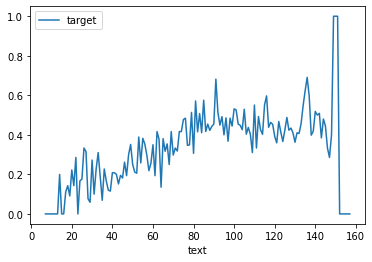

In [38]:
tweet_lens = tweets.text.str.len().sort_values()
def disasters_ratio(x):
    return sum(x) / len(x)
lens = pd.concat([tweet_lens, tweets.target], axis=1).groupby('text').agg(disasters_ratio)
lens.plot()
display(lens)

Quel est le ratio tweet qui parlent de “catastrophes” / tweet normaux ?

In [32]:
target_counts = tweets.target.value_counts()
disaster_count = target_counts[1]
print('ratio:', round(100 * disaster_count / tweets.shape[0], 2), '%')

0    4342
1    3271
Name: target, dtype: int64

3271
2
ratio: 42.97 %


En regardant quelques tweets au hasard, peut-on deviner facilement la “target” ?

Oui, il y a des indices qui sautent aux yeux.

Cela rapelle l'importance de revenir aux données (au métier, à l'empirisme) et de ne pas se perdre dans l'abstraction.

In [39]:
display(tweets.sample(10))

,keyword,location,text,target
id,,,,
6392,hurricane,NaN,@Hurricane_Dolce happy birthday big Bruh,0
212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,1
8854,smoke,NaN,@SidelineSavage what like a pipe made of peanu...,0
8155,rescuers,Nigeria,#RoddyPiperAutos Fears over missing migrants i...,1
77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church...,1
8475,screamed,NaN,i'm sorry i'm so wild in 1d shows like in my w...,0
3973,devastation,Vancouver BC,Is This Country Latin America's Next 'Argentin...,0
1663,bombing,"Washington, D.C.",I think bombing Iran would be kinder... https:...,0
5135,fatal,"Sacramento, CA",Stockton police are investigating a fatal driv...,1


Peut-on déjà détecter des “patterns” ou des mots clés dans les tweets?

Oui, par exemple les mots positifs qui renvoient aux blagues : cool, happy, kind, etc

A votre avis quel serait l’accuracy score qu’un humain pourrait obtenir s’il prédisait  les données “à la main” ?

Reste à savoir de quel 'humain' on parle.

Un humain non dégénéré : 95 %

Un complotiste réactionnaire dégénéré : 30 %


# Partie 2 **Text Processing**

Il vous est demandé d’effectuer un premier traitement des données textuelles (colonne ‘text’). Il s’agira de transformer les données textuelles en **tokens** et de **réduire la dimensionnalité du corpus** en réduisant le vocabulaire (le nombre de tokens différents). L’enjeu est complexe, il en faut ni trop, ni trop peu… Pour vous aider dans ce travail, essayez de répondre aux questions suivantes : 

* Pouvez-vous écrire une fonction qui : tokenize un document, supprime les stopwords, supprime les tokens de moins de 3 lettres ?
* Comment peut-on reconstituer le corpus (c'est-à dire un texte avec l’ensemble des documents) ? 
* Une fois ce corpus constitué, combien de tokens uniques le constitue? Ce nombre vous apparaît-il faible, important, gigantesque ? 26k
* Comment réduire ce nombre de tokens uniques, ou autrement dit “comment réduire la taille du vocabulaire” de ce corpus ? par le nettoyage
* Combien de tokens sont présents une seule fois ? Ces tokens nous seront-ils utiles ? certains ont du sens
* Appliquer une méthode de stemmatisation ou de lemmatisation peut-elle nous aider à réduire la dimensionnalité du corpus ? oui
* Comment visualiser graphiquement, par un WordCloud par exemple, les tokens les plus présents ? je demande à voir
* Pouvez vous appliquer tous les traitements évoqués afin de créer une nouvelle colonne “text” qui serait plus pertinente ? oui

Pouvez-vous écrire une fonction qui :
* tokenize un document,
* supprime les stopwords,
* supprime les tokens de moins de 3 lettres ?

Ma spec :
1. tokenisation des phrases et des mots (sur deux niveaux)
2. stockage dans une colonne supplémentaire du tableau comme liste de listes
3. version sans les stopwords dans une colonnes supplémentaire
4. suppression des tokens de moins de 3 lettre dans une troisième colonne
5. sortir globalement et localement des signatures sous forme de profil des longueurs de tokens (formes indépendamment du contenu) -> graphiques
5. fonctions séparées à intégrer ensuite

In [49]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
tweets = pd.read_csv('nlp-getting-started/train.csv', encoding='utf-8', index_col='id')
# display(tweets)

# Sentences
raw_corpus = tweets.text
corpus = raw_corpus.apply(sent_tokenize).rename('sentences')
sentences_counts = corpus.apply(len).rename('# sentences')
sentences = pd.concat([sentences_counts, corpus], axis=1).sort_values(by='# sentences', ascending=False)
display(sentences)

,# sentences,sentences
id,,
520,12,"[., : .: ., : .: ., : .: ., : .: ., : .: ., : ..."
7023,10,"[_\n????, ?RETWEET\n???????, ????, ?FOLLOW ALL..."
4366,8,[@AGeekyFangirl14 's things she looks in a sig...
4199,8,"[Clev: Me?, | You., Clev: Indeed., | Do you kn..."
10415,7,"[????, throwback Thurs ??, ????, Will You Stil..."
...,...,...
4463,1,[South Side factory where worker electrocuted ...
4459,1,[Youth electrocuted in Khulna | http://t.co/3...
4457,1,[@That_fat_guy there's literally a video of an...


In [52]:
# Words
a_document = corpus[4366]
display(a_document)

def tokenize_sentences(document):
    return [word_tokenize(sentence) for sentence in document]

def sentences_words_counts(tokenized_document):
    return [len(sentence) for sentence in tokenized_document]

tokenized_document = tokenize_sentences(a_document) # [word_tokenize(sentence) for sentence in a_document]
document_words_counts = sentences_words_counts(tokenized_document)

display(tokenized_document)
display(document_words_counts)

["@AGeekyFangirl14 's things she looks in a significant other:\n1.",
 'Beautiful eyes.',
 '2.',
 'Humor.',
 '3.',
 'Farts that creates an earthquake.',
 '???????',
 '?']

[['@',
  'AGeekyFangirl14',
  "'s",
  'things',
  'she',
  'looks',
  'in',
  'a',
  'significant',
  'other',
  ':',
  '1',
  '.'],
 ['Beautiful', 'eyes', '.'],
 ['2', '.'],
 ['Humor', '.'],
 ['3', '.'],
 ['Farts', 'that', 'creates', 'an', 'earthquake', '.'],
 ['?', '?', '?', '?', '?', '?', '?'],
 ['?']]

[13, 3, 2, 2, 2, 6, 7, 1]

In [56]:
tokenized_documents = corpus.apply(tokenize_sentences).rename('tokenized_sentences')
display(tokenized_documents)

id
1        [[Our, Deeds, are, the, Reason, of, this, #, e...
4        [[Forest, fire, near, La, Ronge, Sask, .], [Ca...
5        [[All, residents, asked, to, 'shelter, in, pla...
6        [[13,000, people, receive, #, wildfires, evacu...
7        [[Just, got, sent, this, photo, from, Ruby, #,...
                               ...                        
10869    [[Two, giant, cranes, holding, a, bridge, coll...
10870    [[@, aria_ahrary, @, TheTawniest, The, out, of...
10871    [[M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volc...
10872    [[Police, investigating, after, an, e-bike, co...
10873    [[The, Latest, :, More, Homes, Razed, by, Nort...
Name: tokenized_sentences, Length: 7613, dtype: object

In [57]:
tokenized_documents_words_counts = tokenized_documents.apply(sentences_words_counts).rename('# words')
display(tokenized_documents_words_counts)

id
1            [14]
4          [7, 1]
5        [14, 10]
6             [9]
7            [18]
           ...   
10869        [13]
10870     [21, 3]
10871     [12, 3]
10872     [13, 8]
10873        [16]
Name: # words, Length: 7613, dtype: object

In [58]:
tokenized_sentences = pd.concat([
    tokenized_documents_words_counts,
    tokenized_documents
], axis=1).sort_values(by='# words', ascending=False)
display(tokenized_sentences)

,# words,tokenized_sentences
id,,
1832,"[71, 1]","[[when, you, 're, taking, a, shower, and, some..."
1207,"[59, 1]","[[the, best, thing, at, DQ, is, the, cotton, c..."
7053,"[51, 1]","[[@, kinkyconnors, IM, sorry, for, my, meltdow..."
493,"[45, 1]","[[*, *, OFFICIAL, VID, *, *, #, TheReal, &, gt..."
2361,[45],"[[Great, British, &, lt, ;, b, &, gt, ;, Bake,..."
...,...,...
7295,[1],[[Err:509]]
7088,[1],[[Meltdown]]
5224,[1],[[fatality]]


Retrait des mots vides

In [60]:
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))

On sépare la liste en deux, les stopwords d'un côté, et le reste de l'autre.

In [61]:
display(tokenized_documents)

id
1        [[Our, Deeds, are, the, Reason, of, this, #, e...
4        [[Forest, fire, near, La, Ronge, Sask, .], [Ca...
5        [[All, residents, asked, to, 'shelter, in, pla...
6        [[13,000, people, receive, #, wildfires, evacu...
7        [[Just, got, sent, this, photo, from, Ruby, #,...
                               ...                        
10869    [[Two, giant, cranes, holding, a, bridge, coll...
10870    [[@, aria_ahrary, @, TheTawniest, The, out, of...
10871    [[M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volc...
10872    [[Police, investigating, after, an, e-bike, co...
10873    [[The, Latest, :, More, Homes, Razed, by, Nort...
Name: tokenized_sentences, Length: 7613, dtype: object

Nous sommes en contexte TP, mais il faudrait en production clairement utiliser numpy (ndarrays + isin)

In [63]:
def extract_stopwords(tokenized_document, stopwords):
    return [
        [
            word
            for word in tokenized_sentence
            if word.casefold() in stopwords
        ]
        for tokenized_sentence in tokenized_document
    ]

def extract_meaningfulwords(tokenized_document, stopwords):
    return [
        [
            word
            for word in tokenized_sentence
            if word.casefold() not in stopwords
        ]
        for tokenized_sentence in tokenized_document
    ]

tokenized_documents_stopwords = tokenized_documents.apply(
    lambda x: extract_stopwords(x, stopwords_en)
)

tokenized_documents_meaningfulwords = tokenized_documents.apply(
    lambda x: extract_meaningfulwords(x, stopwords_en)
)

display(tokenized_documents_stopwords)
display(tokenized_documents_meaningfulwords)

id
1                         [[Our, are, the, of, this, all]]
4                                                 [[], []]
5        [[All, to, in, are, being, by], [No, other, or...
6                                                   [[in]]
7                  [[Just, this, from, as, from, into, a]]
                               ...                        
10869                                          [[a, into]]
10870       [[The, out, of, in, in, the, of, the], [Very]]
10871                                        [[S, of], []]
10872                       [[after, an, with, a, in], []]
10873                                    [[The, More, by]]
Name: tokenized_sentences, Length: 7613, dtype: object

id
1        [[Deeds, Reason, #, earthquake, May, ALLAH, Fo...
4        [[Forest, fire, near, La, Ronge, Sask, .], [Ca...
5        [[residents, asked, 'shelter, place, ', notifi...
6        [[13,000, people, receive, #, wildfires, evacu...
7        [[got, sent, photo, Ruby, #, Alaska, smoke, #,...
                               ...                        
10869    [[Two, giant, cranes, holding, bridge, collaps...
10870    [[@, aria_ahrary, @, TheTawniest, control, wil...
10871    [[M1.94, [, 01:04, UTC, ], ?, 5km, Volcano, Ha...
10872    [[Police, investigating, e-bike, collided, car...
10873    [[Latest, :, Homes, Razed, Northern, Californi...
Name: tokenized_sentences, Length: 7613, dtype: object

Constitution de la liste des tokens de moins de 3 lettres, et leur retrait

In [77]:
display(tokenized_documents_meaningfulwords)

def get_short_words_set(tokenized_documents, max_size):
    short_words_set = set()
    #display(tokenized_documents.values)
    for doc in tokenized_documents.values:
        #display(doc)
        for sent in doc:
            for word in sent:
                if len(word) <= max_size:
                    short_words_set.add(word)
    return short_words_set

short_words_set = get_short_words_set(tokenized_documents_meaningfulwords, 2)
display(list(short_words_set)[:10])
display(len(short_words_set))

id
1        [[Deeds, Reason, #, earthquake, May, ALLAH, Fo...
4        [[Forest, fire, near, La, Ronge, Sask, .], [Ca...
5        [[residents, asked, 'shelter, place, ', notifi...
6        [[13,000, people, receive, #, wildfires, evacu...
7        [[got, sent, photo, Ruby, #, Alaska, smoke, #,...
                               ...                        
10869    [[Two, giant, cranes, holding, bridge, collaps...
10870    [[@, aria_ahrary, @, TheTawniest, control, wil...
10871    [[M1.94, [, 01:04, UTC, ], ?, 5km, Volcano, Ha...
10872    [[Police, investigating, e-bike, collided, car...
10873    [[Latest, :, Homes, Razed, Northern, Californi...
Name: tokenized_sentences, Length: 7613, dtype: object

['na', 'Q1', 'XP', 'CR', '45', 'm8', '.', 'xv', 'B', 'H']

607

In [78]:
clean_tokenized_documents = tokenized_documents_meaningfulwords.apply(
    lambda x: extract_meaningfulwords(x, list(short_words_set))
)
display(clean_tokenized_documents)

id
1        [[Deeds, Reason, earthquake, May, ALLAH, Forgi...
4            [[Forest, fire, near, Ronge, Sask], [Canada]]
5        [[residents, asked, 'shelter, place, notified,...
6        [[13,000, people, receive, wildfires, evacuati...
7        [[got, sent, photo, Ruby, Alaska, smoke, wildf...
                               ...                        
10869    [[Two, giant, cranes, holding, bridge, collaps...
10870    [[aria_ahrary, TheTawniest, control, wild, fir...
10871    [[M1.94, 01:04, UTC, 5km, Volcano, Hawaii], [h...
10872    [[Police, investigating, e-bike, collided, car...
10873    [[Latest, Homes, Razed, Northern, California, ...
Name: tokenized_sentences, Length: 7613, dtype: object

Une fois ce corpus constitué, combien de tokens uniques le constitue? Ce nombre vous apparaît-il faible, important, gigantesque ?

Sur la base de la version nettoyée du corpus `clean_tokenized_documents`:

* Nombre de documents
* Nombre de phrases par document
* Nombre de mots par phrase
* Nombre de mots par document
* Nombre de mots uniques par document
* Nombre de phrases uniques par document
* Nombre de phrases uniques pour l'ensemble du corpus
* nombre de mots uniques pour l'ensemble du corpus
* Lexique et fréquences : nombre d'occurrences de chaque mot
* Nombre d'occurrences de chaque phrase

J'ai déjà les premiers, focus sur le lexique :


In [86]:
import pandas as pd
def get_lexicon(tokenized_documents):
    lexicon = dict()
    for doc in tokenized_documents.values:
        for sent in doc:
            for word in sent:
                if word in lexicon:
                    lexicon[word] += 1
                else:
                    lexicon[word] = 1
    return lexicon

lexicon = get_lexicon(clean_tokenized_documents)
lexicon_data = pd.DataFrame.from_dict(lexicon, orient='index')
lexicon_data.columns = ['freq']
lexicon_data.sort_values(by='freq', ascending=False, inplace=True)
display(lexicon_data)
display(lexicon_data.head(50))
display(lexicon_data.tail(50))

,freq
http,4307
...,945
n't,441
https,409
amp,344
...,...
Important,1
//t.co/BN7Xpzqdm0,1
//t.co/KFBjVJiVQB,1
660,1


,freq
http,4307
...,945
n't,441
https,409
amp,344
like,322
via,212
get,184
fire,175
people,166


,freq
underpasses,1
CBCCalgary,1
'Lost,1
enacted,1
Cochrane,1
autism,1
//t.co/Gm80X3vutf,1
Words,1
escorts,1
gfe,1
